In [1]:
#Data Processing
import pandas as pd
import numpy as np

#Data Visulaisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("dark_background")

In [3]:
data= pd.read_csv('/content/startup_funding (1).csv')
data.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
data.shape


(3044, 10)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
#checking for null values
null_check=data.isnull().sum().reset_index()
null_check.columns=['Columns','Number of Nulls']
null_check['% Of Nulls']=((null_check['Number of Nulls']/len(data))*100).round(2)
null_check

,Columns,Number of Nulls,% Of Nulls
0,Sr No,0,0.00
1,Date dd/mm/yyyy,0,0.00
2,Startup Name,0,0.00
3,Industry Vertical,171,5.62
4,SubVertical,936,30.75
5,City Location,180,5.91
6,Investors Name,24,0.79
7,InvestmentnType,4,0.13
8,Amount in USD,960,31.54
9,Remarks,2625,86.24


In [7]:
# 86% of the values in Remarks columns are null.Dropping the columns that are not required
data.drop(['Sr No','Remarks'],axis=1,inplace=True)


In [8]:
data['Startup Name']=data['Startup Name'].str.replace('0','')
data['Industry Vertical']=data['Industry Vertical'].str.replace('0','')
data['City  Location']=data['City  Location'].str.replace('0','')
data['Investors Name']=data['Investors Name'].str.replace('0','')
#data['Startup Name', 'Industry Vertical','City  Location', 'Investors Name']].str.replace('0','')

In [9]:
# Filling the data with mode and mean values
data['SubVertical'].fillna(data['SubVertical'].mode()[0],inplace=True)
data['Industry Vertical'].fillna(data['Industry Vertical'].mode()[0],inplace=True)

<ipython-input-9-64018d5f43cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SubVertical'].fillna(data['SubVertical'].mode()[0],inplace=True)
<ipython-input-9-64018d5f43cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [10]:
#Converting 'Amount in USD' to integer
data["Amount in USD"]=data["Amount in USD"].str.replace(",","")
data["Amount in USD"]=data["Amount in USD"].str.replace("undisclosed","")
data["Amount in USD"]=data["Amount in USD"].str.replace("Undisclosed","")
data["Amount in USD"]=data["Amount in USD"].str.replace("0N/A","")
data["Amount in USD"]=data["Amount in USD"].str.replace("unknown","")
data["Amount in USD"]=data["Amount in USD"].str.replace("+","")

In [11]:
filter1=data[data['Investors Name']=='Atul Jalan']
filter2=data[data['Industry Vertical'].str.contains("xc2")]

data.drop(filter1.index, inplace = True)
data.drop(filter2.index, inplace = True)

In [12]:
data["Amount in USD"]=pd.to_numeric(data["Amount in USD"])


In [13]:
data['Amount in USD'].fillna(data['Amount in USD'].mean(),inplace=True)


<ipython-input-13-559bd1b93abf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Amount in USD'].fillna(data['Amount in USD'].mean(),inplace=True)


In [14]:
#Converting date to datetime and extracting month and year values
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("05/072018","05/07/2018")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("01/07/015","01/07/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("010/7/2015","01/07/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("12/05.2015","12/05/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("13/04.2015","13/04/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("15/01.2015","15/01/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("22/01//2015","22/01/2015")

In [16]:
data['Date dd/mm/yyyy'] = pd.to_datetime(data['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')

In [17]:
data['Year']=data['Date dd/mm/yyyy'].dt.year
data['Month']=data['Date dd/mm/yyyy'].dt.month

[Text(0.5, 1.0, 'Distribution of null values in the data')]

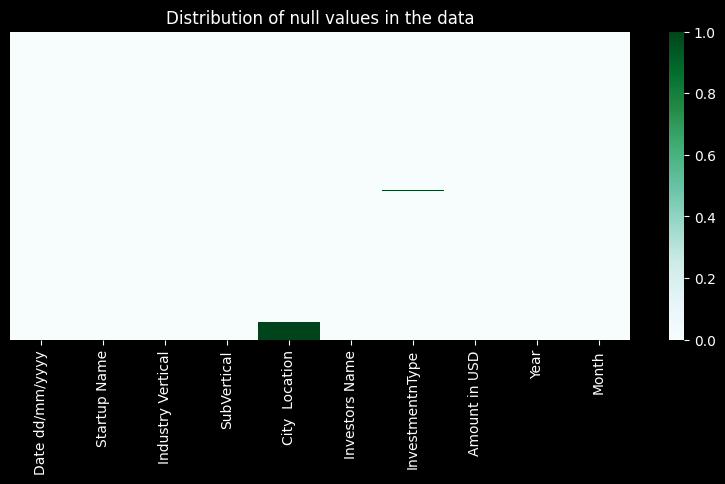

In [18]:
plt.figure(figsize=(10,4))
g1=sns.heatmap(data=data.isnull(),yticklabels=False,cmap='BuGn')
g1.set(title="Distribution of null values in the data")

In [20]:

# Convert 'Amount in USD' column to numeric before grouping
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'], errors='coerce')

#Who are the Top 10 investors in Indian ecossystem?
Top_investors = pd.DataFrame(data.groupby(['Investors Name'])['Amount in USD'].sum()).sort_values(by="Amount in USD",ascending=False)

[Text(0.5, 1.0, 'Top 10 Ivestors by amount Invested')]

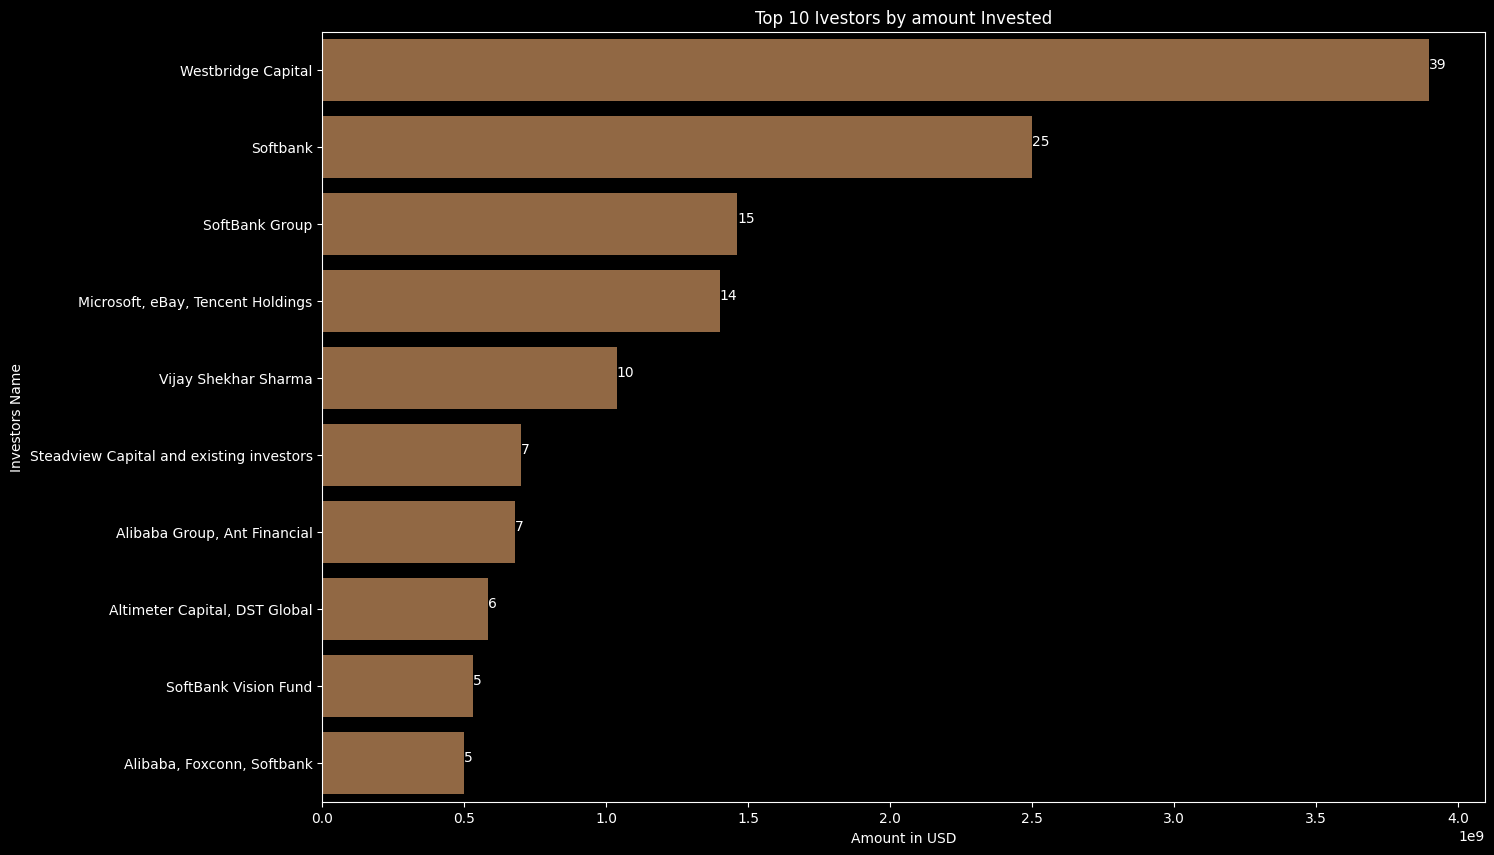

In [21]:
plt.figure(figsize=(15,10))
color1=['#9E6737','#AA743A','#B6823D','#C09141','#C9A046','#D1AF4B','#D7C051','#DDD059','#E1E162','#E4F26E']
sns.set_palette(sns.color_palette(color1))
g2=sns.barplot(data=(Top_investors[0:10]).reset_index(),x="Amount in USD",y='Investors Name')
for a in g2.patches:
    g2.annotate('{:.0f}'.format((a.get_width()/100000000).round(2)),
              ((a.get_width(),a.get_y()+a.get_height()/2)),
               ha="left", va="top",
               xytext=(0,9),
               textcoords="offset points")

g2.set(title="Top 10 Ivestors by amount Invested")

In [22]:
#In which city are the highest number of startups located
data_cities=data.dropna(how="any",axis=0,subset=['City  Location'])
data_cities.shape


(2847, 10)

In [24]:
#In which city are the highest number of startups located
data_cities=data.dropna(how="any",axis=0,subset=['City  Location'])
data_cities.shape

# Ensure 'Amount in USD' is numeric and handle errors
data_cities['Amount in USD'] = pd.to_numeric(data_cities['Amount in USD'], errors='coerce')
# Replace invalid values with 0 - adjust as needed for your data
data_cities['Amount in USD'] = data_cities['Amount in USD'].fillna(0)


data_cities_sum=pd.DataFrame(data_cities.groupby(['City  Location'])['Amount in USD'].sum())
data_cities_sum['% Investements']=((data_cities_sum['Amount in USD']/data_cities_sum['Amount in USD'].sum())*100).round(2)
data_cities_sum=data_cities_sum.reset_index().sort_values(by='% Investements',ascending=False)

<ipython-input-24-d648bd8048b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cities['Amount in USD'] = pd.to_numeric(data_cities['Amount in USD'], errors='coerce')
<ipython-input-24-d648bd8048b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cities['Amount in USD'] = data_cities['Amount in USD'].fillna(0)


In [25]:
Top_10 = data_cities_sum[['City  Location','% Investements']][0:10]
Top_10.loc[len(Top_10.index)] = ['Others', 100-(data_cities_sum['% Investements'][0:10]).sum()]
Top_10=Top_10.sort_values(by='% Investements',ascending=False)

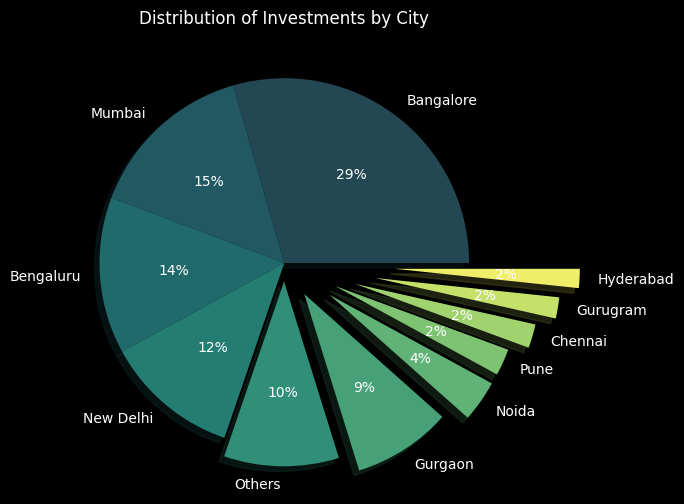

In [26]:
plt.figure(figsize=(6,6))
plt.title("Distribution of Investments by City")
colors1 = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80','#4EF4D1']
colors=['#234753','#215861','#206A6B','#247D73','#318F77','#46A178','#60B276','#7EC372','#A0D36E','#C6E16A','#EFEE69']
plt.axis("equal")
g3=plt.pie(Top_10['% Investements'],labels=Top_10['City  Location'],colors=colors,autopct='%0.0f%%',
           shadow=True,explode=[0, 0, 0, 0, 0.1, 0.2,0.3,0.3,0.4,0.5,0.6])

plt.show()

In [28]:
#Bengaluru sees the highest investmensts followed by Mumbai & New Delhi
#Which industry verticals are most favored by the investors for funding?
#Bengaluru sees the highest investmensts followed by Mumbai & New Delhi
#Which industry verticals are most favored by the investors for funding?

# Convert 'Amount in USD' to numeric, handling errors and replacing invalid values with 0
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'], errors='coerce').fillna(0)

Inv_verticals_Top_10=pd.DataFrame(data.groupby(['Industry Vertical'])['Amount in USD'].sum()).reset_index().sort_values(by='Amount in USD',ascending=False)[0:10]

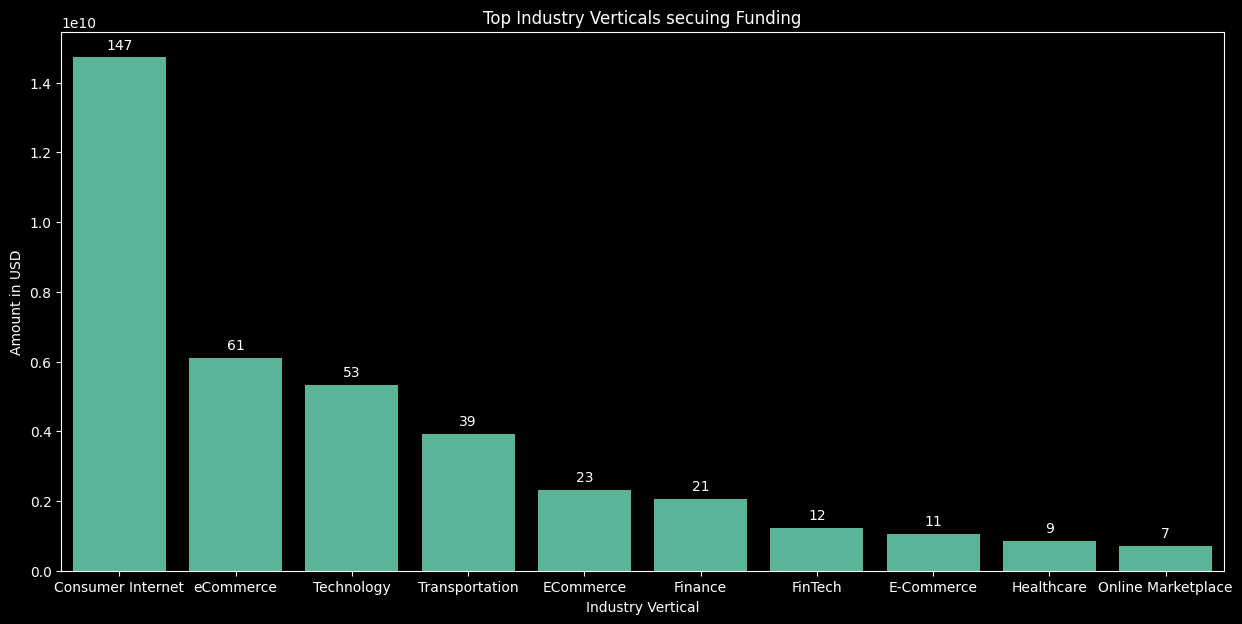

In [29]:
plt.figure(figsize=(15,7))
color2=['#4BC49E','#5CC28C','#6EBF7A','#7FBB69','#91B65B','#A1B14F','#B1AA48','#C0A345','#CD9C46','#D8944C']
sns.set_palette(sns.color_palette(color2))
g4=sns.barplot(data=Inv_verticals_Top_10,x='Industry Vertical',y='Amount in USD')
g4.set(title="Top Industry Verticals secuing Funding")

for a in g4.patches:
    g4.annotate('{:.0f}'.format((a.get_height()/100000000).round(2)),
                ((a.get_x()+a.get_width()/2),a.get_height()),
                ha="center",va="center",
                xytext=(0,9),
                textcoords= 'offset points'
               )

In [30]:
#Consumer Internet and eCommerce are the industries investors are most interested in
#How is the funding ecosystem evolving with time ?
data['YearMonth']=data['Year']*100+data['Month']


In [31]:
data_time=data[['Date dd/mm/yyyy','YearMonth','City  Location','Amount in USD']]
data_time=data_time.dropna(how="any",axis=0,subset=['City  Location'])

In [32]:
data_time=pd.DataFrame(data_time[['YearMonth','City  Location']].value_counts()).reset_index().sort_values(by=['City  Location','YearMonth'],ascending=True)

In [33]:
data_time=data_time[data_time['City  Location'].isin(['Bengaluru','Mumbai','New Delhi','Gurgaon','Noida'])]


In [34]:
data_time.columns=['YearMonth','City  Location','Count']


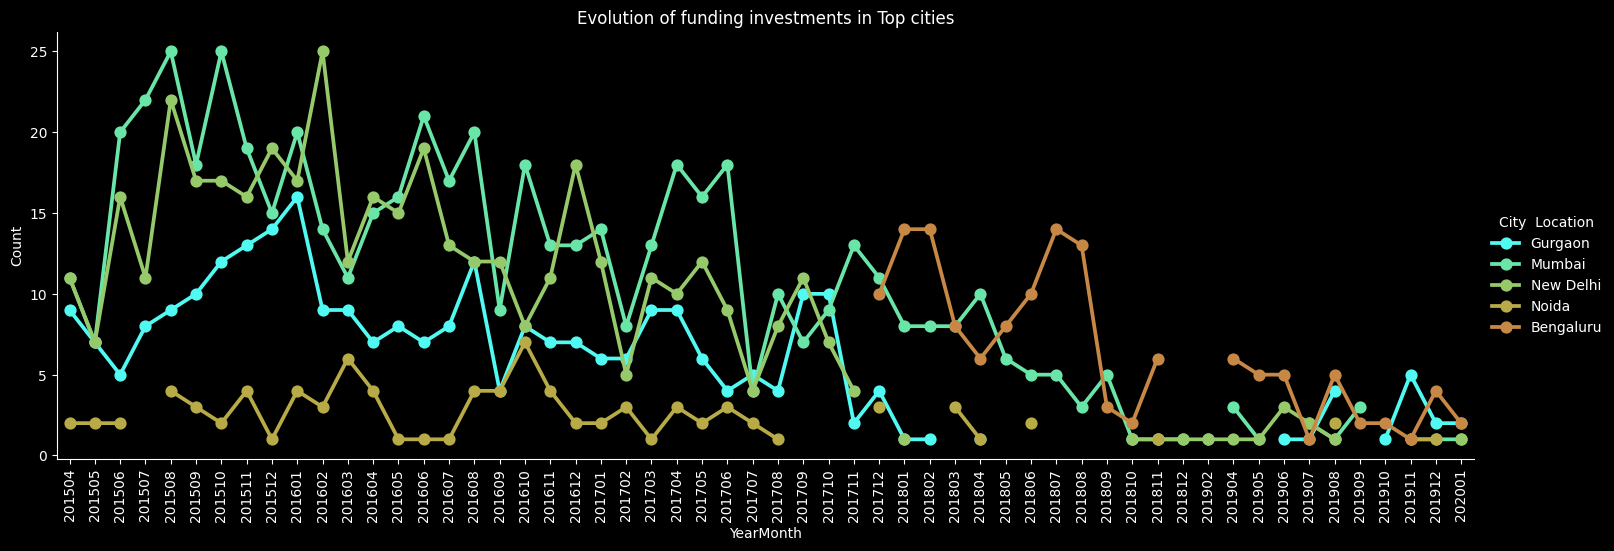

In [35]:
color3=['#50F9F1','#6AE5A8','#96C96A','#B7AA47','#C78845']
sns.set_palette(sns.color_palette(color3))
g5=sns.catplot(data=data_time,x='YearMonth',y='Count',hue='City  Location',kind="point",height=5, aspect=3.0)
g5.set(title='Evolution of funding investments in Top cities')
plt.xticks(rotation=90)
plt.show()